In [1]:
import pandas as pd
import re
import numpy as np


In [7]:
db= pd.read_csv(r'../dane/moves.csv')
db

,Unnamed: 0,score,delta_time,WhiteElo,BlackElo,WhiteRatingDiff,TimeControl
0,0,0,0.0,1079.0,1071.0,-30.0,60+0
1,1,dubious move,0.0,1079.0,1071.0,-30.0,60+0
2,2,0,3.0,1079.0,1071.0,-30.0,60+0
3,3,0,0.0,1079.0,1071.0,-30.0,60+0
4,4,0,0.0,1079.0,1071.0,-30.0,60+0
...,...,...,...,...,...,...,...
1970710,1970710,0,4.0,1008.0,971.0,-12.0,120+1
1970711,1970711,0,1.0,1008.0,971.0,-12.0,120+1
1970712,1970712,0,0.0,1008.0,971.0,-12.0,120+1
1970713,1970713,blunder,0.0,1008.0,971.0,-12.0,120+1


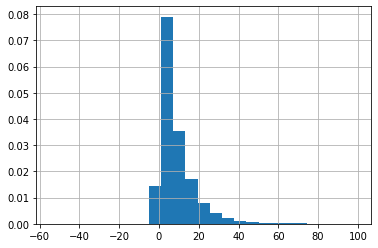

In [11]:
blunder_60 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['delta_time']< 100)]
a = blunder_60['delta_time'].hist(bins = 25, density = True)

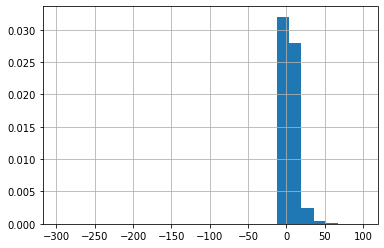

In [10]:
blunder_60 = db[(db['TimeControl'] == '300+0')& (db['delta_time']< 100)]
a = blunder_60['delta_time'].hist(bins = 25, density = True)

In [56]:
n = 16
a =
a[:n]

['w',
 'b',
 'w',
 'b',
 'w',
 'b',
 'w',
 'b',
 'w',
 'b',
 'w',
 'b',
 'w',
 'b',
 'w',
 'b']